# Capstone Webscrapping using BeautifulSoup

(Please insert the background here )



In [2]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:777]

b'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 1045 character. 

In [5]:
print(soup.prettify()[:1045])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'functi

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

### Explanation
>as we see in the HTML the full table containing the list is inside the `div` tag with class `lister-list`
<br>
>and then each row is also inside `div` tag with class `lister-item mode-advanced`

In [6]:
table = soup.find("div",{"class":"lister-list"}) 
tr = table.find_all("div",{"class":"lister-item mode-advanced"})
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt1312171">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt1312171/">
    <img alt="The Umbrella Academy" class="loadlate" data-tconst="tt1312171" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BNzA5MjkwYzMtNGY2MS00YWRjLThkNTktOTNmMzdlZjE3Y2IxXkEyXkFqcGdeQXVyMjkwMzMxODg@._V1_UX67_CR


Do the scrapping process here (please change this markdown with your explanation)

### Explanation
>to make it easy i define python class `Data` to contain the row from Bsoup
<br>
> - for `Title` i get `h3` tag with class `lister-item-header` which inside consist of `a` tag and there exist the Title 
> - for `Year` i get `span` tag with class `lister-item-year text-muted unbold` and get the text inside
> - for `Rating` and `Metascore` i get `div` tag with class `ratings-bar` and check the tag first whether this exist or not. since some of the data doesnt have the `ratings-bar`.<br> for `Rating` i will get `strong` tag inside `ratings-bar` tag.<br> for `Metascore` i get from `span` tag with class `metascore` and check first whether it exist. because not all data have metascore. then get the text with strip since the data inside having a whitespace
> - for `Votes` i get `p` tag with class `sort-num_votes-visible` and check the tag exist first. when exist i check the text inside `span` with class `text-muted` searching for text `Votes:` (i found after crawling 200+ page it was gross instead of Votes). then i get `span` tag with attribute `name:nv` then get the `data-value` attribute
> - then put all to the class and push to the array

In [7]:
class Data:
  def __init__(self, title, year, rating, votes, metascore):
    self.title = title
    self.year = year
    self.rating = rating
    self.votes = votes
    self.metascore = metascore

  def to_dict(self):
    return {
        'Title': self.title,
        'Year': self.year,
        'Rating': self.rating,
        'Votes': self.votes,
        'Metascore': self.metascore
    }

In [12]:
temp = [] #initiating a tuple

for i in range(0, len(tr)):

    row = tr[i]
    #use the key to take information here
    # title class
    titleH3=row.find("h3",{"class":"lister-item-header"})
    title=titleH3.find("a").text
    year=titleH3.find("span",{"class":"lister-item-year text-muted unbold"}).text

    rating=0
    metascore=0
    ratingTag = row.find("div",{"class":"ratings-bar"})
    if ratingTag is not None:
        ratingsBarTag = ratingTag.find("strong")
        if ratingsBarTag is not None:
            rating = ratingsBarTag.text

        metascoreTag = ratingTag.find("span",{"class":"metascore"})
        if metascoreTag is not None:
            metascore = metascoreTag.text.strip()

    votes=0
    votesTag = row.find("p",{"class":"sort-num_votes-visible"})
    if votesTag is not None:
        votesText = votesTag.find("span",{"class":"text-muted"}).text
        if votesText == 'Votes:':
            votes = votesTag.find("span",{"name":"nv"})['data-value']

    d= Data(title,year,rating,votes,metascore)
    temp.append(d) #append the needed information 


,Title,Year,Rating,Votes,Metascore
0,The Umbrella Academy,(2019– ),8.0,112070,0
1,The Boys,(2019– ),8.7,156868,0
2,Knives Out,(2019),7.9,360321,82
3,Watchmen,(2019),8.1,74509,0
4,Euphoria,(2019– ),8.3,44531,0


Put the array into dataframe

In [13]:
import pandas as pd

df= pd.DataFrame.from_records([d.to_dict() for d in temp])
df.head()

,Title,Year,Rating,Votes,Metascore
0,The Umbrella Academy,(2019– ),8.0,112070,0
1,The Boys,(2019– ),8.7,156868,0
2,Knives Out,(2019),7.9,360321,82
3,Watchmen,(2019),8.1,74509,0
4,Euphoria,(2019– ),8.3,44531,0


Do the data cleaning here (please change this markdown with your explanation)

### Explanation
> i fix the type first and since the cleaning i do is inside the loop im not doing any cleaning

In [14]:
df['Rating'] = df['Rating'].astype('float64')
df['Votes'] = df['Votes'].astype('int64')
df['Metascore'] = df['Metascore'].astype('int64')
df.dtypes

Title         object
Year          object
Rating       float64
Votes          int64
Metascore      int64
dtype: object

Do the data visualisation here. (please change this markdown with your explanation)

### Explanation
> i do bar plot for 7 highest by IMDB Rating
<br>
> i do bar plot for 7 highest by Votes Rating
<br>
> i do bar plot for 7 highest by Metascore Rating

<AxesSubplot:xlabel='Title'>

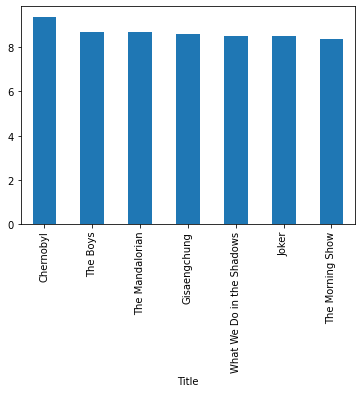

In [17]:
df.set_index('Title')['Rating'].sort_values(ascending=False).head(7).plot.bar()

<AxesSubplot:xlabel='Title'>

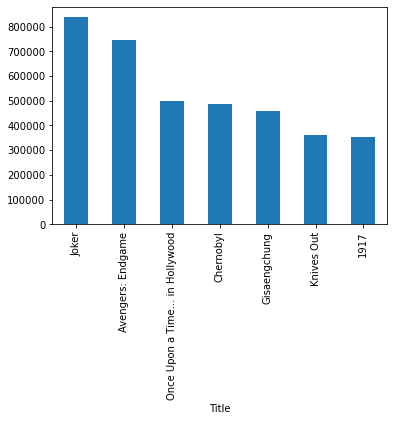

In [16]:
df.set_index('Title')['Votes'].sort_values(ascending=False).head(7).plot.bar()

<AxesSubplot:xlabel='Title'>

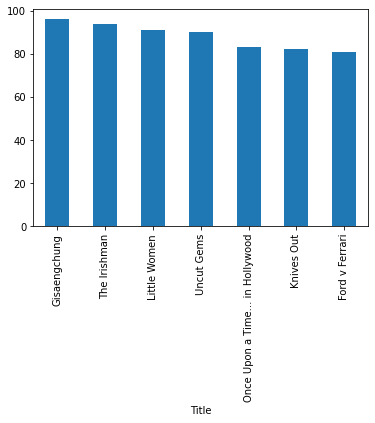

In [18]:
df.set_index('Title')['Metascore'].sort_values(ascending=False).head(7).plot.bar()

### Explanation
> - we can See that `Chernobyl` get the highest IMDB Rating
> - we can See that `Joker` get the most Votes
> - we can See that `Gisaengchung` get the highest metascore. but since most of the data doesnt have metascritic score so this data is not realy reliable